<a href="https://colab.research.google.com/github/annvrowan/GEOV181/blob/main/GEOV181_Weather_Climate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GEOV181: Weather and Climate

In this exercise we will look at how we can use publicly available data to describe the current weather in Bergen, how weather patterns vary over time, and space, and what are the uncertainties associated with our descriptions of the weather.

Some of the code that you need is provided, and you will use your knowledge gained in using Python through this course to write the code required for this exercise into this notebook.

You can use Gemini in Colab or a CoPilot-style AI helper to start producing new code or to check the code that you write. You can also use these AI tools to explain the exisiting code to you. Bear in mind that it's important that you are able to understand all the code that you use to be able to check that it is working as you expect it to.


### How does this exercise work?

Similar to the previous module, this exercise is a [Jupyter](https://jupyter.org/) notebook. A Jupyter notebook contains a mix of text blocks and [Python](https://www.python.org/) code blocks that you can run yourself. The text blocks are used to explain the data analysis workflow of this exercise. The data analysis itself is performed in blocks of Python code. The Python code blocks contain a mix of actual code and comments, which start with `#` and which describe what each line of code below does.

We will run this notebook in [Google Colab](https://colab.research.google.com/). Google Colab gives us the opportunity to run this notebook online and in a web browser, which is the easiest way to complete this exercise.

Note: If you prefer not to use Google Colab then you can also run this notebook on your own computer. This requires installing Python and Jupyter on your own machine. The easiest to get things running is to install the Python distribution [Anaconda](https://www.anaconda.com/download/) (notice the odd preference for snake names in the Python world!). This may require a bit more fiddling, but your instructors for this exercise are happy to help out.


## Exercise 1: Collecting weather observations
This exercise will make use of free meteorological data collected by MET Norway provided through a Creative Commons BY 4.0 licence:

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons-lisens" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>

This means that we can use these data as long as we acknowledge how they were collected by adding a comment such as:
*Credit should be given to The Norwegian Meteorological institute, shortened “MET Norway”, as the source of data, for example, by including in the text: "Data from The Norwegian Meteorological Institute" or "Based on data from MET Norway".*

To access data from MET Norway we use their Frost API data service.

You first need to create a user number for yourself using your email address in the box named 'Create a user' here:
https://frost.met.no/howto.html. This generates a unqiue client ID that you can then use to access the data that you want.

You then add your client ID into the code block below and start running the code to collect the data.


In [1]:
# Libraries needed (pandas is not standard and must be installed in Python)
import requests
import pandas as pd

# Insert your own client ID here
# client_id = '<INSERT CLIENT ID HERE>'
client_id = '0ed7796b-057a-4134-8a5c-190293abfe41'

### Collect air temperature data
The next block of code retrieves data from Frost using the requests.get function. Its first argument is the endpoint we are going to get data from, in this case the observations endpoint. The next argument is a dictionary containing the parameters that we need to define in order to retrieve data from this endpoint: sources, elements and referencetime. You can change these variables in the code block to collect the data that you want:

- **Sources** are the weather station IDs where data are measured. SN50539 is the UiB Florida AWS in Bergen (49 m.o.h.). You can find a list of available stations [here](https://seklima.met.no/stations/).
- **Elements** are the type of weather data that we want to collect. Start by collecting mean daily air temperature. There is a list of the available data types [here](https://frost.met.no/elementtable).
- **referencetime** is the range of days over which we want to collect the observations.


In [9]:
# Define endpoint and parameters to collect air temperature data
endpoint = 'https://frost.met.no/observations/v0.jsonld'
parameters = {
    'sources': 'SN50539',
    'elements': 'mean(air_temperature P1D)',
    'referencetime': '2023-01-01/2023-12-31',
}
# Issue an HTTP GET request
r = requests.get(endpoint, parameters, auth=(client_id,''))
# Extract JSON data
json = r.json()

Once we have extracted the JSON from the request, we want to make sure that we actually got some data. This block will output detailed error information.

In [10]:
# Check if the request worked, print out any errors
if r.status_code == 200:
    data = json['data']
    print('Data retrieved from frost.met.no!')
else:
    print('Error! Returned status code %s' % r.status_code)
    print('Message: %s' % json['error']['message'])
    print('Reason: %s' % json['error']['reason'])

Data retrieved from frost.met.no!


Data retrieved from frost.met.no!
If the above block returned an error, then the rest cannot be run. If it printed out a success, then we are all set.
Below, we use the pandas library to insert the observation data into a table format. This is useful for doing all kinds of analysis on the returned data. If you only want to print or save the data, then pandas won't be necessary, and you can simply loop over the elements in the data variable.
Note: the block below is tailored to the observations endpoint, and changes would need to be made to accomodate other endpoints.

In [11]:
# This will return a Dataframe with all of the observations in a table format
df = pd.DataFrame()
for i in range(len(data)):
    row = pd.DataFrame(data[i]['observations'])
    row['referenceTime'] = data[i]['referenceTime']
    row['sourceId'] = data[i]['sourceId']
    df = pd.concat([row])

df = df.reset_index()

You can run the line below to get a preview of the DataFrame table. Note that this is only showing the first few lines (the 'head') of your data table.

In [12]:
df.head()

,index,elementId,value,unit,level,timeOffset,timeResolution,timeSeriesId,performanceCategory,exposureCategory,qualityCode,referenceTime,sourceId
0,0,mean(air_temperature P1D),-0.1,degC,"{'levelType': 'height_above_ground', 'unit': '...",PT0H,P1D,0,E,2,0,2023-12-30T00:00:00.000Z,SN50539:0
1,1,mean(air_temperature P1D),2.9,degC,"{'levelType': 'height_above_ground', 'unit': '...",PT6H,P1D,0,E,2,2,2023-12-30T00:00:00.000Z,SN50539:0


To make a shorter and more readable table, you can use the code below:

In [13]:
# This defines the columns will be kept in your second dataframe
columns = ['sourceId','referenceTime','elementId','value','unit','timeOffset']
df2 = df[columns].copy()
# Convert the time value to something Python understands
df2['referenceTime'] = pd.to_datetime(df2['referenceTime'])

In [14]:
# Preview the result. Note that this is only showing the first few lines (the 'head') of your data table
df2.head()

,sourceId,referenceTime,elementId,value,unit,timeOffset
0,SN50539:0,2023-12-30 00:00:00+00:00,mean(air_temperature P1D),-0.1,degC,PT0H
1,SN50539:0,2023-12-30 00:00:00+00:00,mean(air_temperature P1D),2.9,degC,PT6H


### Plot air temperature data
The output above is a preview of part of the data contained within the data frame. For the next step, collect all the data from your dataframe and plot the data as time (x-axis) and mean air temperature (y-axis).
- Edit the code block below to collect the data, important matplotlib and plot your air temperature data in a suitable format. Temperature data are usually plotted as a continuous line without marker points.

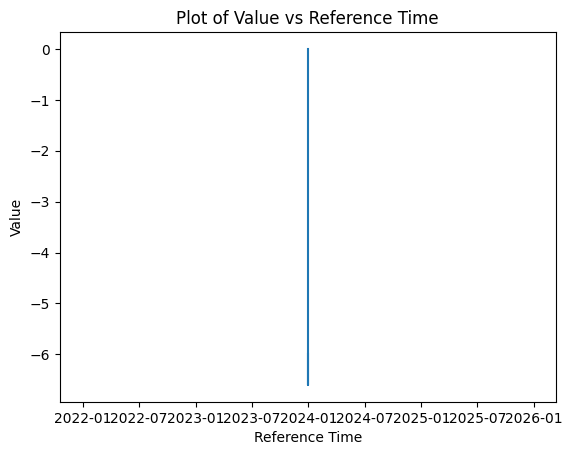

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df2['referenceTime'], df2['value'])
plt.xlabel('Reference Time')
plt.ylabel('Value')
plt.title('Plot of Value vs Reference Time')
plt.show()

### Collect and plot precipitation data
Now repeat the process to collect precipitation data and plot this for the same station over the same time period. You will need to edit the code block below to collect the data that you need, and add new code blocks to format and plot these data (as you have done above for air temperature).
- Note that we collected air temperature as a daily mean value, but for precipitation measurments a 'mean' is not so meaningful. Instead we want to collect the total amount of precipitation that falls in a day.
- Precipitation data should therefore be plotted differently to temperature data. Precipitation data are usually plotted as vertical bars of the total amount for each measurmenet period (e.g., day, week).
- If you wish, you could plot temperature and precipitation on the same plot by using different y-axis scales on the left and right sides of the plot.
- Avoid over-writing exisiting variables by giving outputs in the next set of code blocks different variables names to those used already.

In [ ]:
# Define endpoint and parameters to collect precipitation data
endpoint = 'https://frost.met.no/observations/v0.jsonld'
parameters = {
    'sources': 'SN50539',
    'elements': 'sum(precipitation_amount P1D)',
    'referencetime': '2023-01-01/2023-12-31',
}
# Issue an HTTP GET request
r = requests.get(endpoint, parameters, auth=(client_id,''))
# Extract JSON data
json = r.json()

In [ ]:
# Add your new code here:

### Exercise 1A: Calculate basic statistics for your air temperature data

1. What is the maximum daily temperature for the 12-month period?
2. What is the minimum daily temperature for the 12-month period?
3. Average the maximum and minimum daily temperatures to find the mean annual temperature.
4. Average all daily temperatures to find the mean annual temperature.
5. Calculate the difference between the two mean annual temperatures.
6. How do your two mean annual temperatures compare?
7. Calculate the median daily temperature for your data and compare this with your mean values.

Then take a break from your screen to chat with the group at your table to compare your results. If you have used data from weather stations with very different locations or elevations then you might see signifciant differences in the weather variables.

In [ ]:
# Add your new code here:

### Exercise 1B: Calculate basic statistics for your precipitation data

1. What is the maximum daily precipitation for the 12-month period?
2. What is the minimum daily precipitation for the 12-month period?
3. How many days per year is there no rainfall at your location?
4. Which month is driest?
5. Which month is wettest?

Then take a break from your screen to chat with the group at your table to compare your results. If you have used data from weather stations with very different locations or elevations then you might see signifciant differences in the weather variables.

In [ ]:
# Add your new code here: